# Regressão Linear Simples

Nesse script aprenderemos a usar a biblioteca scikit-learn para implementar um modelo de regressão linear simples. Para isso iremos utilizar um conjunto de dados relacionado ao consumo de combustível e a emissão de dióxido de carbono dos carros. Então, dividiremos nossos dados em conjuntos de treinamento e teste, criaremos um modelo usando o conjunto de treinamento e o avaliaremos usando o conjunto de testes. Por fim, usaremos nosso modelo para predizer a emissão de dióxido de carbono em novos dados.

### Objetivos


- Usar a biblioteca sckit-learn para implementar um modelo de regressão linear simples;

- Criar, treinar, testar e usar o modelo.

# Bibliotecas

Nós vamos utilizar as seguintes bibliotecas:

- [matplotlib](https://matplotlib.org/stable/users/history.html) para desenvolver plots no python;
- [pandas](https://pandas.pydata.org/docs/) fornece ferramentas para analisar dados no python;
- [numpy](https://numpy.org/) oferece diversas funções matemáticas e processamento vetorizado.

In [1]:
# importando bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
# baixando os dados
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-03-07 16:18:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.1s    

2021-03-07 16:18:05 (658 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



### Entendendo os dados

Acabamos de baixar o conjunto de dados de consumo de combustível, FuelConsumption.csv, que contém as taxas de consumo de combustível e o valor estimado de emissão de dióxido de carbono de veículos leves a venda no Canadá. Para mais informações, [clique aqui](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).

Abaixo temos as colunas do nosso conjunto de dados e exemplos dos seus valores:

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

# Dados

Vamos utilizar a biblioteca pandas para ler nosso csv com o método *read_csv()*:

In [3]:
# lendo dados
df = pd.read_csv('FuelConsumption.csv')

# visualizando 5 primeiras linhas
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# visualizando uma descrição estatistica dos dados
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Agora vamos recolher algumas colunas interessantes para o desenvolvimento do nosso estudo:

In [5]:
# selecionando caracteristcas de interesse 
features = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

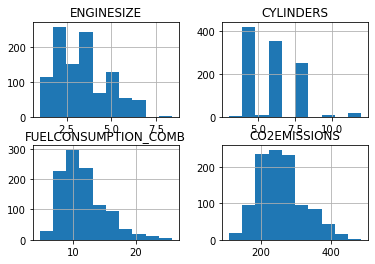

In [23]:
# visualizando distribuicao das caracteristicas
plot = features[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
plot.hist()
plt.show()

Vamos explorar a relação do tamanho do motor (ENGINESIZE), quantidade de cilindros (CYLINDERS) e consumo de combustível (FUELCONSUMPTION_COMB), com a emissão de dióxido de carbono (CO2EMISSIONS).

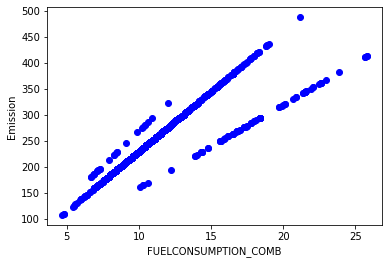

In [8]:
# visualizando relação entre FUELCONSUMPTION_COMB e CO2EMISSION
plt.scatter(features.FUELCONSUMPTION_COMB, features.CO2EMISSIONS, color = 'blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Emission')
plt.show()

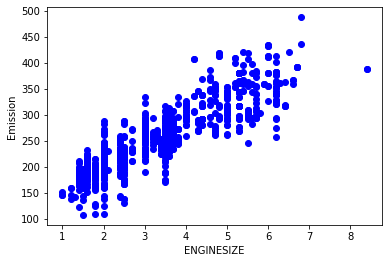

In [9]:
# visualizando relação entre ENGINESIZE e CO2EMISSION
plt.scatter(features.ENGINESIZE, features.CO2EMISSIONS, color = 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('Emission')
plt.show()

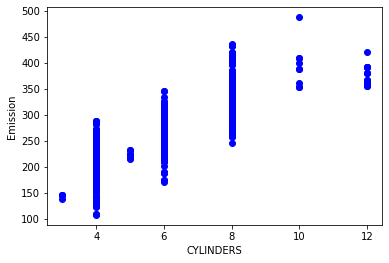

In [10]:
# visualizando relação entre CYLINDERS e CO2EMISSION
plt.scatter(features.CYLINDERS, features.CO2EMISSIONS, color = 'blue')
plt.xlabel('CYLINDERS')
plt.ylabel('Emission')
plt.show()

# Treino e Teste

É preferível que os dados que usarmos para testar nosso modelo não sejam os mesmos dados utilizados para o treinamento. Para satisfazer isso, iremos criar um conjunto de dados de treinamento, *train*, e um conjunto de dados de teste, *test*. Isso irá garantir uma avaliação mais acurada do nosso modelo, pois o conjunto de testes não faz parte dos dados utilizados para treiná-lo. 

Como já sabemos os resultados da emissão de combustível nos dados de teste e eles são desconhecidos para nosso algortimo, isso se torna uma ótima maneira de testar nosso modelo!

Vamos dividir nossos dados com as seguintes proporções: 80% dos dados para o treinamento e 20% para teste. (Por que não utitlizar 50% / 50%? Essa vou deixar você pensar. Para te ajudar, pense em uma criança... quanto mais conhecimento ela adquire, mais inteligente ela fica! Nosso modelo não é diferente.)

Para dividir nossos dados vamos utilizar o método *np.random.rand()* que irá gerar números aleatórios que serão utilizados para recolher os dados a partir dos índices.

In [11]:
# selecionando indices aleatorios dos dados
split = np.random.rand(len(df)) < 0.8
train = features[split]
test = features[~split]

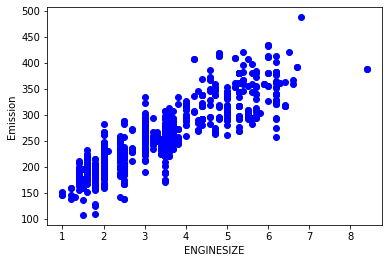

In [12]:
# distribuição dos dados de treinamento apos divisão
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('Emission')
plt.show()

# Modelo de Regressão Simples

As técnicas de regressão consistem no processo de predizer um valor em um intervalo contínuo. Dessa forma, elas relacionam um valor $Y$, uma variável dependente, a uma função de $X$, uma variável independente:

>    $Y$ = $Xa + b$

A regressão tenta minimizar o erro associado aos valores preditos, $Ŷ$ e os valores reais. Logo, o objetivo é encontrar valores de a, *coef*, e b, *intercept*, tal qual esse erro seja mínimo.

Para esclarecer um pouco mais, no contexto da regressão o **erro** de um modelo é a diferença entre os dados reais e as predições da reta gerada pelo modelo. 


# Modelo

Agora vamos utilizar a biblioteca sklearn para modelar nossos dados e encontrar os valores de *a* (coef) e *b* (intercept):

In [13]:
from sklearn import linear_model

# criando objeto 
regr = linear_model.LinearRegression()

In [14]:
# escolhendo ENGINESIZE como variavel independente
train_x = np.asanyarray(train[['ENGINESIZE']])

# escolhendo CO2EMISSIONS como variavel dependente
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [15]:
# modelando os dados
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# visualidando a e b
print('Coefficient: ', np.squeeze(regr.coef_))
print('Intercept: ', np.squeeze(regr.intercept_))

Coefficient:  38.843503112734176
Intercept:  126.55576349882361


Como já mencionado, os valores *a* e *b* da regressão linear simples são os parâmetros que modelam nossa reta. Como você viu acima, a biblioteca sklearn possui métodos implementados que nos possibilitam encontrar esses parâmetros diretamente dos dados.

Vamos visualizar como nossa reta ficou:

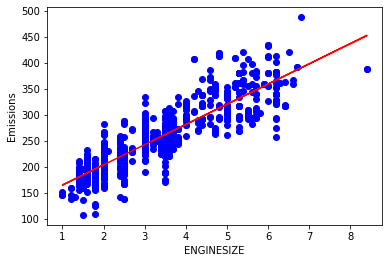

In [26]:
# plotando linha encontrada
coef = np.squeeze(regr.coef_)
intercept = np.squeeze(regr.intercept_)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, coef * train_x + intercept, '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

# Avaliação

Para avaliar o desempenho do nosso modelo utilizaremos os valores preditos e os valores reais para calcular sua acurácia.
As métricas de avaliação tem um papel fundamental no desenvolvimento de um modelo, pois fornecem uma visão das áreas que requerem melhorias.

No nosso exemplo, iremos utilizar o erro quadrado médio - *Mean Squared Error (MSE)*, mas saiba que existem diversas métricas e a escolha destas dependem do tipo do seu modelo, o tipo dos seus dados, domínio sobre o problema, etc.

Uma rápida explicação a respeito da nossa métrica...
- MSE: é a média do quadrado do erro. É uma métrica popular devido ao termo ao quadrado aumentar exponencialmente os erros maiores em comparação com os menores. (Podemos pensar que de certo modo essa métrica enfatiza os erros maiores).



In [19]:
from sklearn.metrics import r2_score

# recolhendo colunas para teste -> note que estamos recolhendo as colunas utilizadas no treinamento
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = np.squeeze(regr.predict(test_x))

In [24]:
print('Residual sum of squares (MSE): %.2f' % np.mean((test_y_ - test_y) ** 2))

Residual sum of squares (MSE): 7135.57


# Predição

Bom e como eu utilizo isso para predizer a emissão de CO$_2$ para novos carros baseado no tamanho do motor? Simples, basta substituir os valores de *a* (coef) e *b* (intercept) encontrados na nossa equação:

>    $Y$ = $X*coef + intercept$

In [35]:
new_enginsize = 7

Ŷ = coef * new_enginsize + intercept

print('Predict value is %.2f' % Ŷ)

Predict value is 398.46


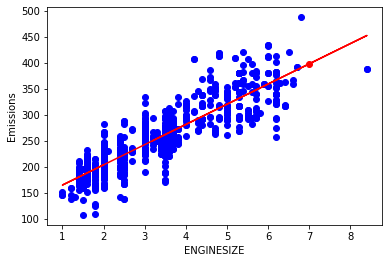

In [36]:
# visualzando valor predito
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, coef * train_x + intercept, '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.plot(new_enginsize, Ŷ, 'ro') 
plt.show()

Conteúdo inspirado no curso: *IBM ML0101EN
Machine Learning with Python: A Practical Introduction*

autor: Felipe Marcelo, estudante de graduação do curso de Informática Biomédica, USP-RP.